In [96]:
import csv
import pandas as pd
import shap
import sklearn
import numpy as np
import matplotlib
import interpret.glassbox
data = pd.read_csv('cohortpetit.csv')
data2 = pd.read_csv('cohort100.csv')

In [97]:
y = (data['i.coronari'])
data = data.drop(['i.death', 'id', 'i.coronari', 'i.ami', 'i.angor'], axis = 1)
# data2 = data2.drop(['id', 'user', 'i.death', 'dentrance', 'd.death', 't.death', 't.ami', 't.angor', 't.pad', 't.stroke_i', 't.coronari', 'd.ami', 'd.angor', 'd.pad', 'd.stroke_i', 'cod.ami', 'cod.angor', 'cod.pad', 'cod.stroke_i', 'd.coronari'], axis = 1)

In [98]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
# feature_names = [i for i in data.columns ]
X = data[feature_names]
# my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)
##########
X100 = data2[feature_names]

In [99]:
feature_names

['user',
 'age',
 'men',
 'chdl',
 'cldl',
 'ct',
 'ggt',
 'glucosa',
 'got',
 'gpt',
 'tg',
 'pad',
 'pas',
 'i.pad',
 'i.stroke_i']

In [100]:
# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

Permutation explainer: 1001it [03:00,  5.23it/s]                                


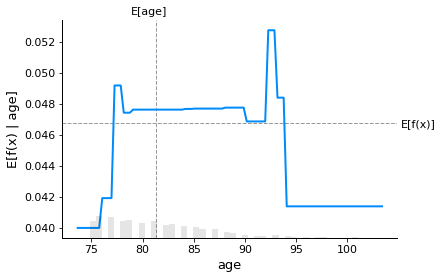

In [101]:
sample_ind = 200
# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "age", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

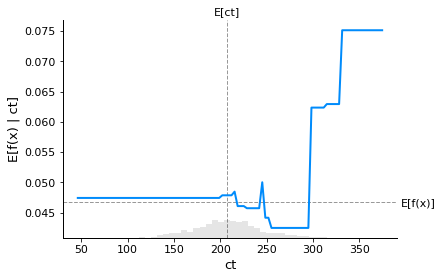

In [102]:
fig,ax = shap.partial_dependence_plot(
    "ct", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

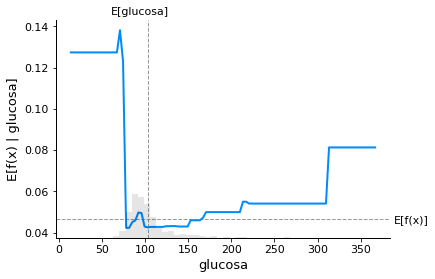

In [103]:
fig,ax = shap.partial_dependence_plot(
    "glucosa", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


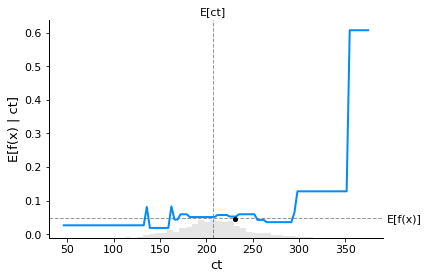

In [106]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "ct", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)



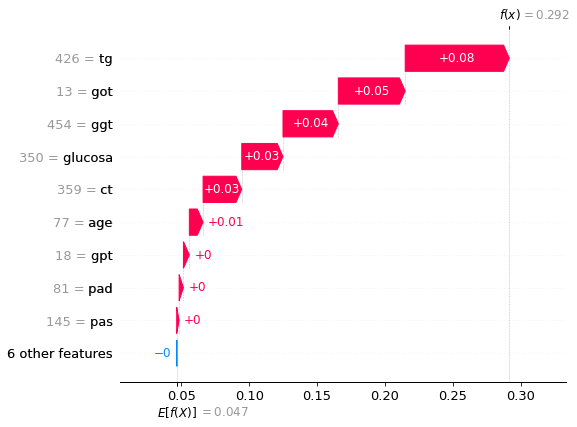

In [107]:
sample_ind = data['ct'].idxmax()
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=10)

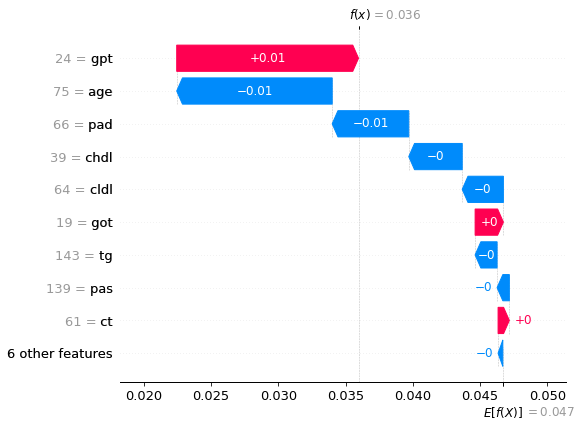

In [108]:
sample_ind = data['ct'].idxmin()
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=10)

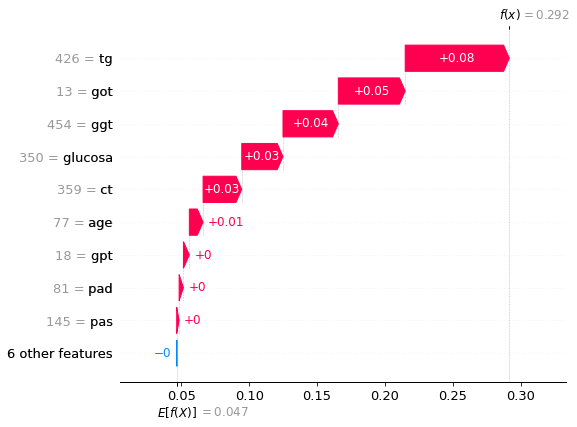

In [109]:
sample_ind = data['ct'].idxmax()
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=10)

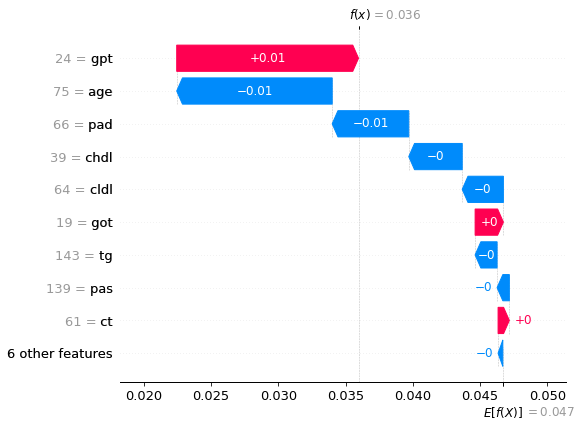

In [110]:
sample_ind = data['ct'].idxmin()
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=10)

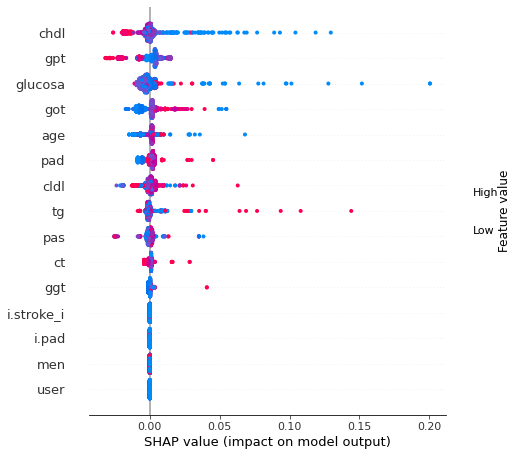

In [112]:
shap.plots.beeswarm(shap_values_ebm, max_display=16)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


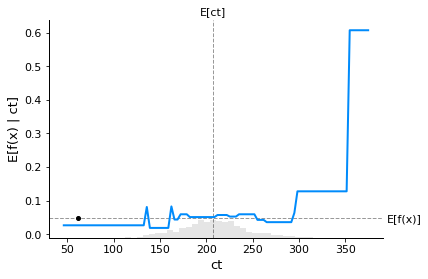

In [113]:
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "ct", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

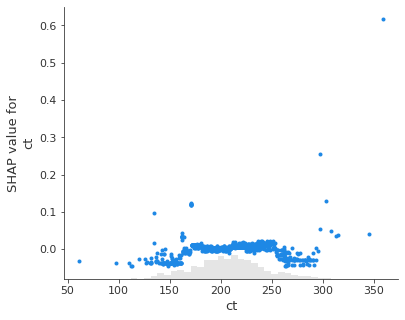

In [114]:
shap.plots.scatter(shap_values_xgb[:,"ct"])